In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Ravdess = "/content/drive/MyDrive/Thesis_datasets/Ravdess/audio_speech_actors_01-24"
Crema = "/content/drive/MyDrive/Thesis_datasets/Crema-D/AudioWAV"
Tess = "/content/drive/MyDrive/Thesis_datasets/Tess"
Savee = "/content/drive/MyDrive/Thesis_datasets/Savee"

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess +"/"+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()
Ravdess_df.shape

(1440, 2)

In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
Crema_df.shape

(2533, 2)

In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+ dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
Tess_df.shape

(2800, 2)

In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.shape

(480, 2)

In [8]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()
data_path.shape

(7253, 2)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for model building
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import classification_report,accuracy_score
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,Input
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
import pickle
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Conv1D, ZeroPadding1D, GRU,Activation
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
"""
with open("/content/drive/MyDrive/Thesis_datasets/full_dat_speech_output.pickle", 'wb') as handle:
    pickle.dump(Features, handle, protocol=pickle.HIGHEST_PROTOCOL)
"""

with open('/content/drive/MyDrive/Thesis_datasets/full_dat_speech_output.pickle', 'rb') as handle:
    Features = pickle.load(handle)

print(Features.shape)

(21759, 170)


In [11]:
#zcr=0
chr=list(range(1,13))
mfc=list(range(13,33))
#rms=33
mel=list(range(34,162))
ton=list(range(162,168))

Renaming columns according to feature extraction technique

In [12]:
#ZCR
Features.rename(columns={0:'ZCR'},inplace=True)
#CHROMA VECTOR
for i in chr:
    Features.rename(columns={i:'Chroma_Vect'},inplace=True)
#MFCC
for i in mfc:
    Features.rename(columns={i:'MFCC'},inplace=True)
#RMS
    Features.rename(columns={33:'RMS'},inplace=True)
#MEL
for i in mel:
    Features.rename(columns={i:'mel_spect'},inplace=True)
#TONNETZ
for i in ton:
    Features.rename(columns={i:'tonnetz'},inplace=True)

In [13]:
Features = Features.reindex(np.random.permutation(Features.index))

In [14]:
Features.to_csv('Converted_audiofiles.csv',index=False)

In [15]:
Features=pd.read_csv('Converted_audiofiles.csv',mangle_dupe_cols=True)
Features.head(2)

,ZCR,Chroma_Vect,Chroma_Vect.1,Chroma_Vect.2,Chroma_Vect.3,Chroma_Vect.4,Chroma_Vect.5,Chroma_Vect.6,Chroma_Vect.7,Chroma_Vect.8,...,mel_spect.126,mel_spect.127,tonnetz,tonnetz.1,tonnetz.2,tonnetz.3,tonnetz.4,tonnetz.5,emotion_labels,gender_labels
0,0.073891,0.457927,0.424135,0.443748,0.432621,0.457097,0.570265,0.604063,0.543393,0.504490,...,7.051226e-06,5.311965e-07,-0.021221,0.015702,-0.045529,-0.026291,-0.022694,-0.008573,disgust,Female
1,0.051569,0.613652,0.604489,0.605645,0.613159,0.672055,0.680757,0.660805,0.685561,0.673756,...,8.067946e-11,7.727598e-11,-0.024643,0.017358,-0.099146,-0.020570,0.025062,-0.006624,neutral,Female


In [16]:
Features['Gender_emotion']=Features['gender_labels']+'_'+Features['emotion_labels']
#Y1=Features['emotion_labels']
Features=Features.drop(['gender_labels','emotion_labels'],axis=1)

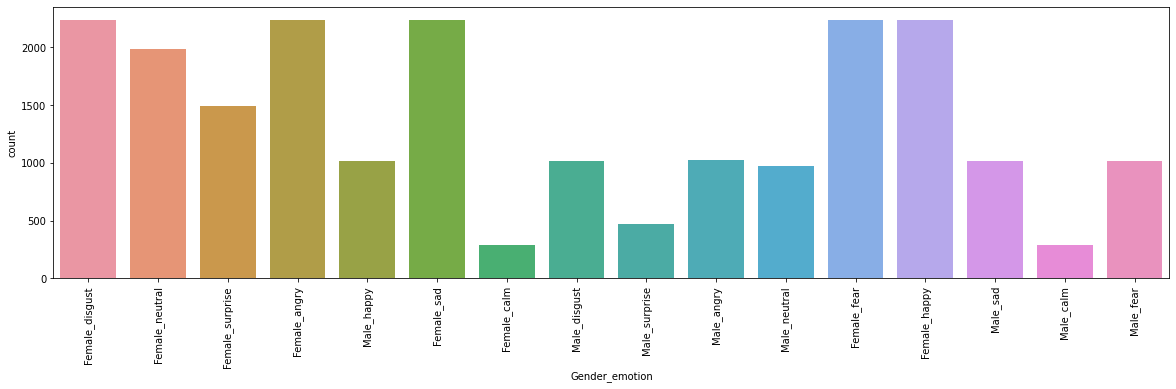

In [17]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(Features['Gender_emotion'])
plt.savefig('distribution.png')

In [34]:
X=Features.drop(['Gender_emotion'],axis=1)
Y=Features['Gender_emotion']

In [35]:
Y.shape,X.shape

((21759,), (21759, 168))

In [36]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True,test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17407, 168), (17407, 16), (4352, 168), (4352, 16))

In [38]:
y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_integers),y= y_integers)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

{0: 0.609147536394177,
 1: 5.131780660377358,
 2: 0.5961301369863014,
 3: 0.6060933147632313,
 4: 0.609830437219731,
 5: 0.6799609375,
 6: 0.607786312849162,
 7: 0.8983794384805945,
 8: 1.344792954264524,
 9: 4.750818777292577,
 10: 1.3381765067650677,
 11: 1.3283730158730158,
 12: 1.3235249391727495,
 13: 1.4467253989361701,
 14: 1.3771360759493672,
 15: 2.9403716216216216}

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17407, 168), (17407, 16), (4352, 168), (4352, 16))

In [40]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17407, 168, 1), (17407, 16), (4352, 168, 1), (4352, 16))

In [25]:
model1=Sequential()
model1.add(Conv1D(528, kernel_size=20, strides=4, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))
model1.add(Bidirectional(LSTM(256)))
model1.add(Dense(units=128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=16, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 42, 528)           11088     
                                                                 
 batch_normalization (BatchN  (None, 42, 528)          2112      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 42, 528)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 512)              1607680   
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

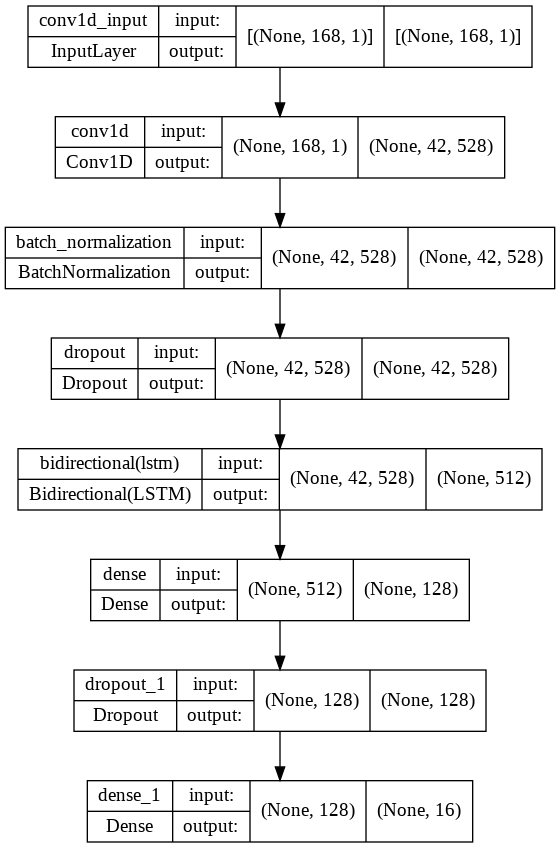

In [26]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
adam = Adam(lr=1e-4, clipnorm=2.0,clipvalue=0.5)
model1.compile(optimizer = adam , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [28]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=.1, verbose=0, patience=2, min_lr=0.0001)
history=model1.fit(x_train, y_train ,batch_size=25, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp],class_weight=d_class_weights)

Epoch 1/50
697/697 [==============================] - 25s 14ms/step - loss: 2.2373 - accuracy: 0.2747 - val_loss: 1.7587 - val_accuracy: 0.4398 - lr: 1.0000e-04
Epoch 2/50
697/697 [==============================] - 9s 13ms/step - loss: 1.7578 - accuracy: 0.4264 - val_loss: 1.4405 - val_accuracy: 0.5246 - lr: 1.0000e-04
Epoch 3/50
697/697 [==============================] - 9s 13ms/step - loss: 1.5531 - accuracy: 0.4883 - val_loss: 1.2896 - val_accuracy: 0.5600 - lr: 1.0000e-04
Epoch 4/50
697/697 [==============================] - 10s 14ms/step - loss: 1.4346 - accuracy: 0.5225 - val_loss: 1.1872 - val_accuracy: 0.5795 - lr: 1.0000e-04
Epoch 5/50
697/697 [==============================] - 9s 13ms/step - loss: 1.3369 - accuracy: 0.5484 - val_loss: 1.1480 - val_accuracy: 0.5903 - lr: 1.0000e-04
Epoch 6/50
697/697 [==============================] - 9s 13ms/step - loss: 1.2744 - accuracy: 0.5630 - val_loss: 1.1224 - val_accuracy: 0.6057 - lr: 1.0000e-04
Epoch 7/50
697/697 [==================

136/136 [==============================] - 2s 6ms/step - loss: 0.7249 - accuracy: 0.7617
Accuracy of our model on test data :  76.171875 %


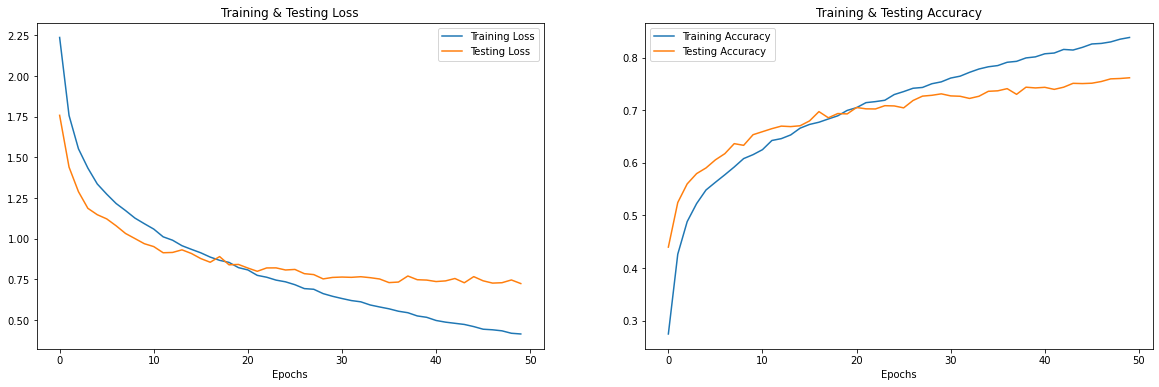

In [29]:
print("Accuracy of our model on test data : " , model1.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [30]:
pred_testa = model1.predict(x_test)
pred_testa

array([[4.1423682e-09, 2.2121429e-09, 2.5677552e-06, ..., 3.1573704e-09,
        5.5991216e-09, 7.4327838e-13],
       [1.4128551e-04, 6.9153386e-05, 5.7037234e-02, ..., 1.5087951e-05,
        2.6340259e-04, 8.6313963e-07],
       [8.1207808e-03, 8.5119312e-10, 1.1464608e-06, ..., 5.3298654e-09,
        5.7317378e-09, 6.5234559e-08],
       ...,
       [6.0131278e-08, 1.4281262e-15, 1.3124668e-10, ..., 1.8111196e-10,
        2.0034842e-10, 7.9412521e-06],
       [1.3226154e-08, 5.2294671e-09, 2.2049879e-07, ..., 1.2207902e-03,
        9.9857795e-01, 6.3093194e-07],
       [7.1650487e-04, 1.3554146e-07, 1.9381112e-04, ..., 8.7065823e-02,
        1.1078184e-02, 6.3542009e-04]], dtype=float32)

In [41]:
y_pred = encoder.inverse_transform(pred_testa)
y_test = encoder.inverse_transform(y_test)

In [33]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

   Female_angry       0.84      0.88      0.86       452
    Female_calm       0.85      0.93      0.89        76
 Female_disgust       0.81      0.71      0.76       413
    Female_fear       0.84      0.76      0.80       443
   Female_happy       0.76      0.75      0.75       454
 Female_neutral       0.70      0.85      0.77       383
     Female_sad       0.84      0.80      0.82       448
Female_surprise       0.92      0.95      0.94       277
     Male_angry       0.82      0.78      0.80       214
      Male_calm       0.69      0.98      0.81        59
   Male_disgust       0.68      0.53      0.60       204
      Male_fear       0.59      0.56      0.58       195
     Male_happy       0.55      0.58      0.57       192
   Male_neutral       0.60      0.67      0.63       220
       Male_sad       0.64      0.64      0.64       224
  Male_surprise       0.77      0.84      0.80        98

       accuracy              